# 2020.12.18、2021.1.14に取得したデータを分析する

## 12/25MTG時のToDo
* ~~URL送る　https://www.anaconda.com/products/individual#Downloads~~
* 反転時の摩擦係数の急上昇 くさび効果
* クリームの吐き出されやすさが速度依存 : 反転時の摩擦係数の急上昇（周期成分）の極大値から吐き出されやすさを推定できる？
* 速度に対する摩擦係数を取る　周期ごとに分解
* 極大値に位相ズレがないか確認する
* ディリクレ核で反転時における急激な摩擦係数の上昇成分を抜き出す
* ~~測定開始直後と最後のデータは抜く~~

## その他思いついたToDo(優先度低)
* ~~GitHubにpushして共有→所内ネットワークからアクセスできるか確認~~
* 使い方マニュアル作る
* パッケージ化してGitHubに上げる

In [1]:
#### Variables
# Files
v_path_conditions_201218 = 'Data/20201218_condition.csv'
v_path_conditions_210114 = 'Data/20210114_condition.csv'

In [2]:
### Import libraries
import io 
import sys
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm

#### Visualize related libraries
from matplotlib import pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 15, 6

#### Self-defined module
sys.path.append('C:/Users/90033353/GoogleDrive_Nagi/Friction')
from frictionData import FrictionData

In [3]:
# Condition
v_data_conditions_201218 = pd.read_csv(v_path_conditions_201218, index_col=0, skiprows=1)
v_data_conditions_210114 = pd.read_csv(v_path_conditions_210114, index_col=0, skiprows=1)
v_data_conditions = pd.concat([v_data_conditions_201218, v_data_conditions_210114])

# Load data
v_frictionData = {}
for i in v_data_conditions.index:
    v_frictionData[str(i)] = FrictionData(str(i), v_data_conditions)

## 生データの描画

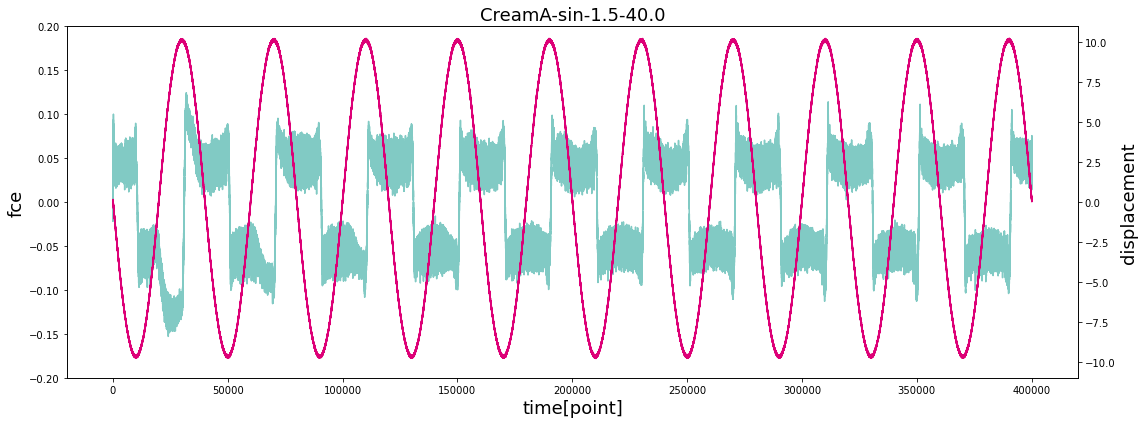

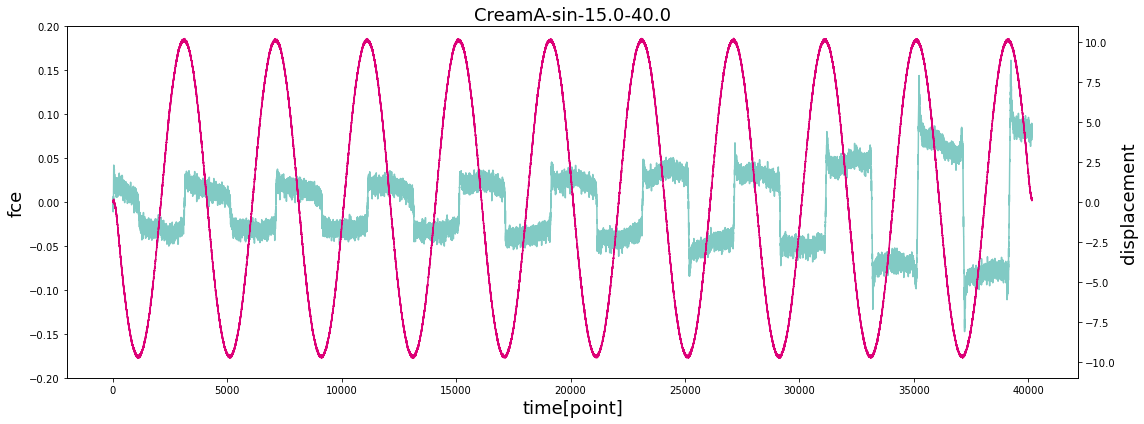

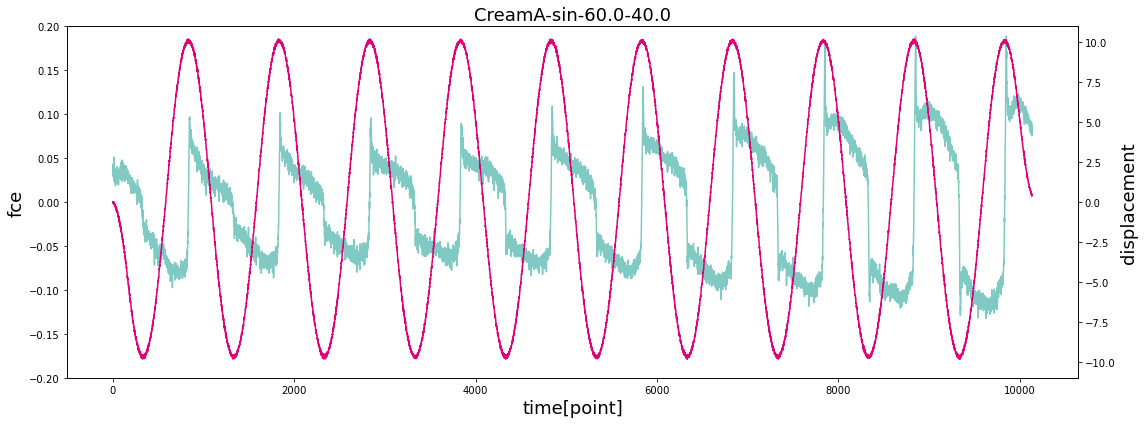

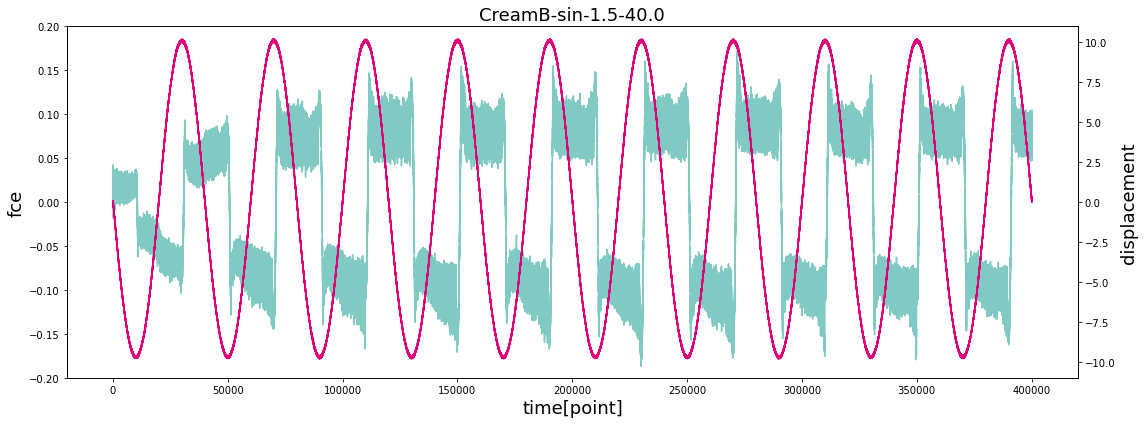

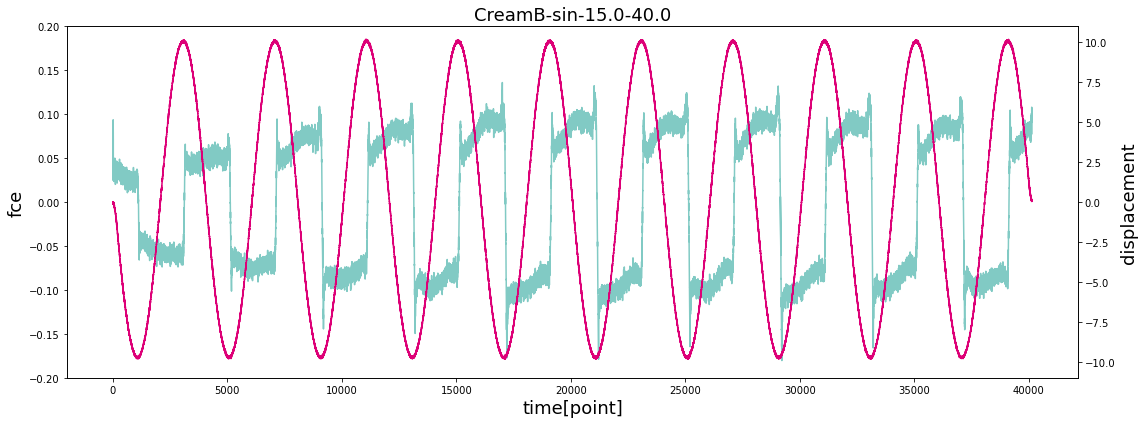

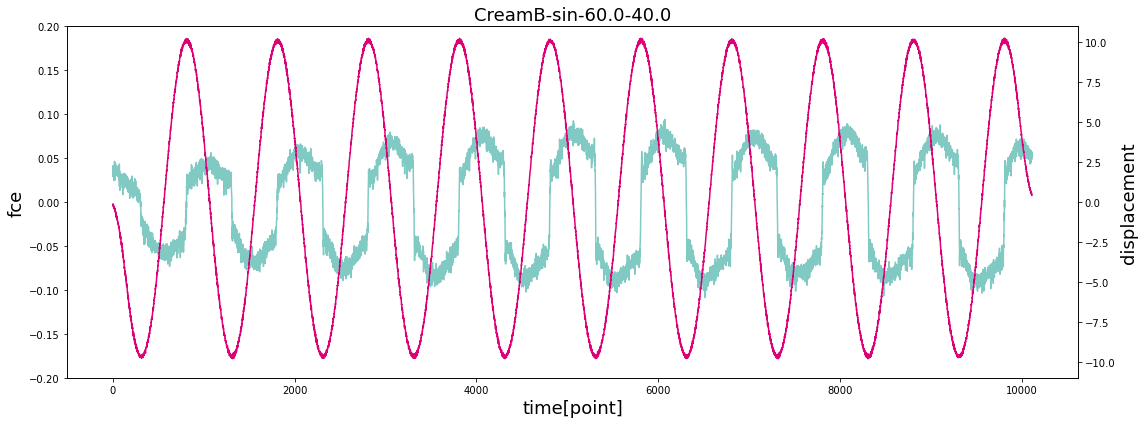

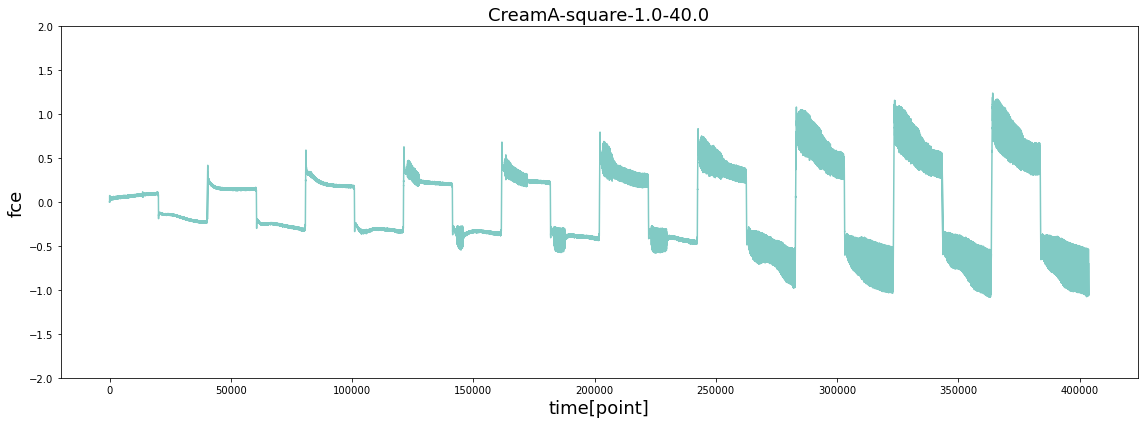

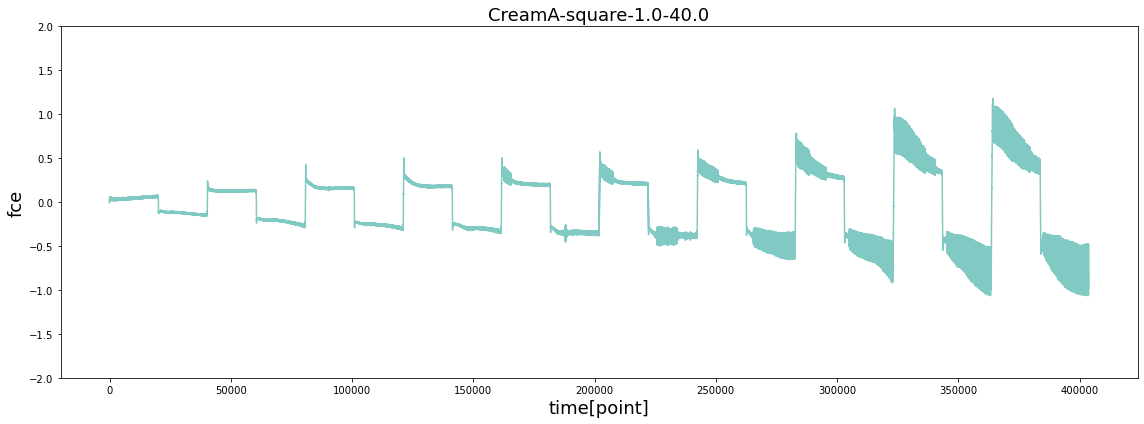

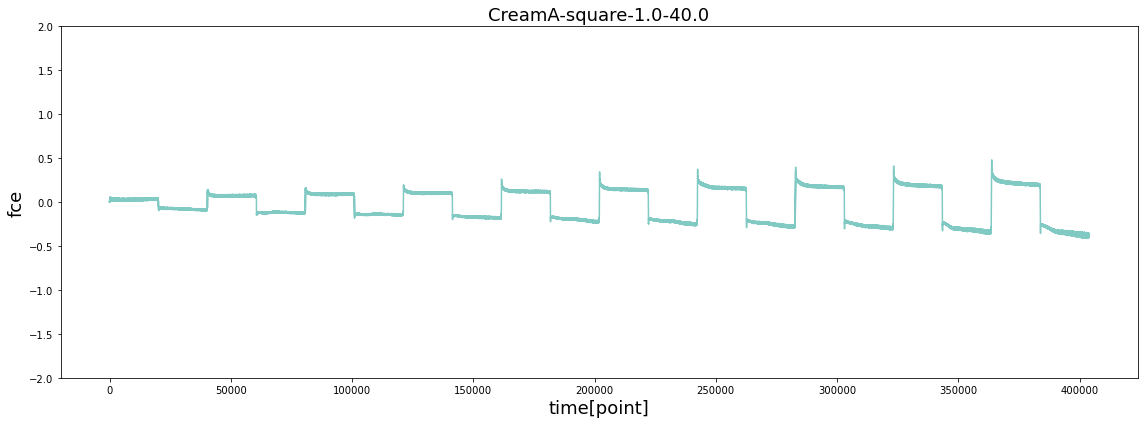

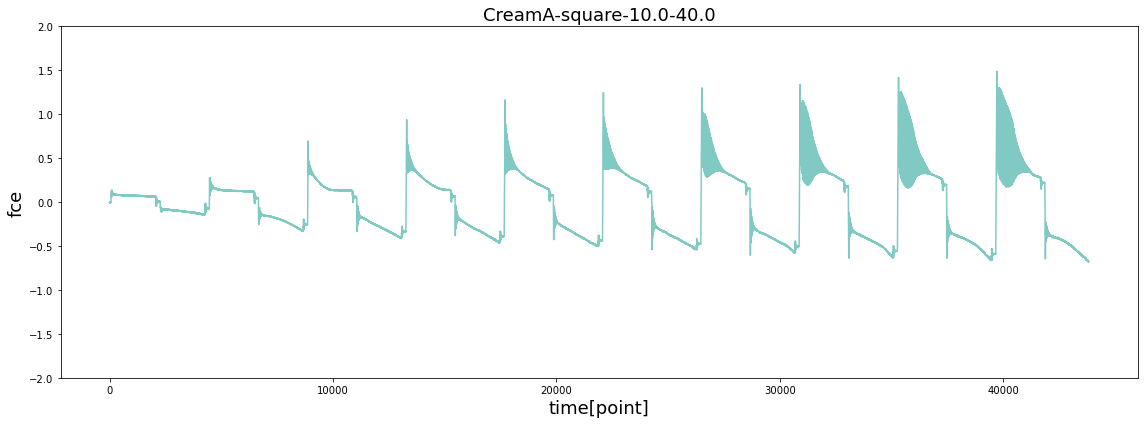

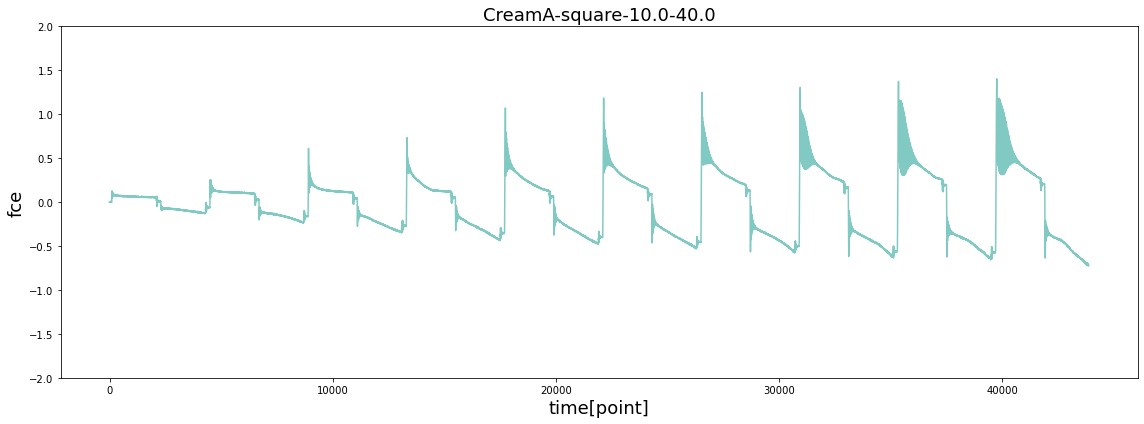

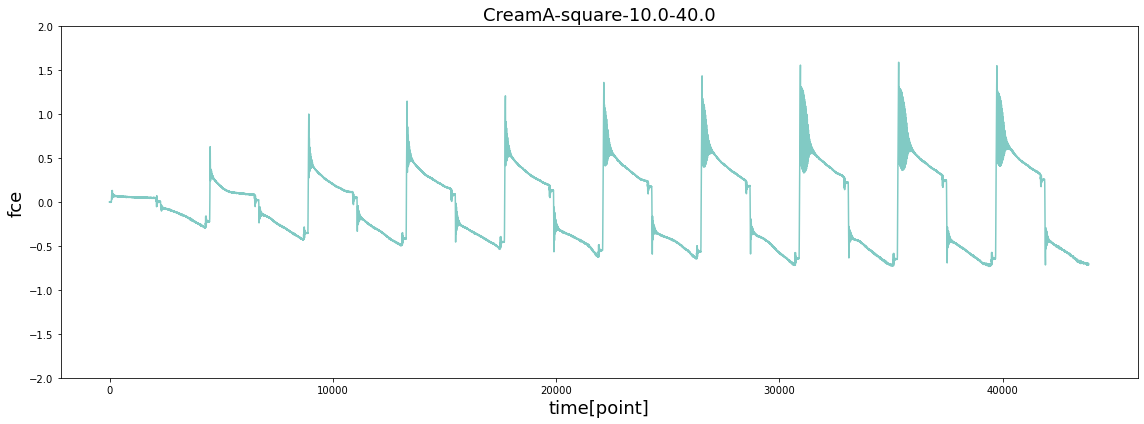

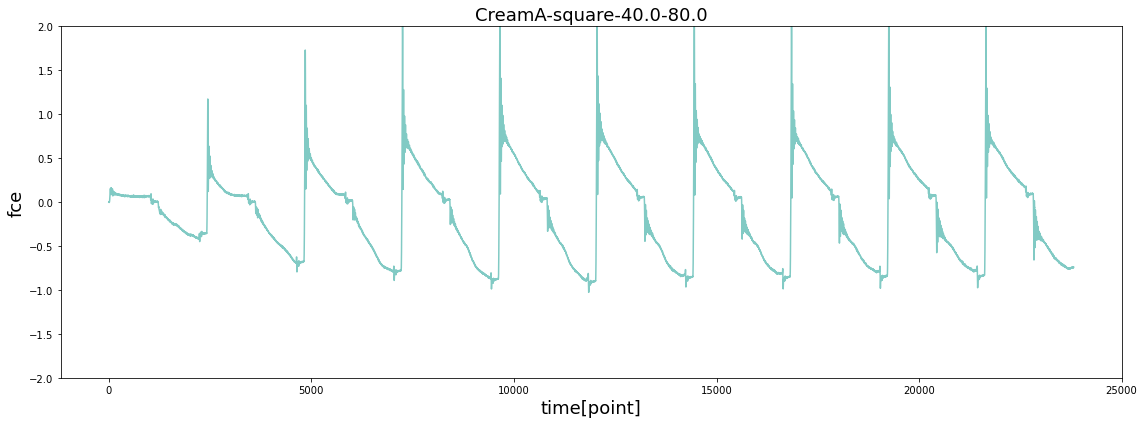

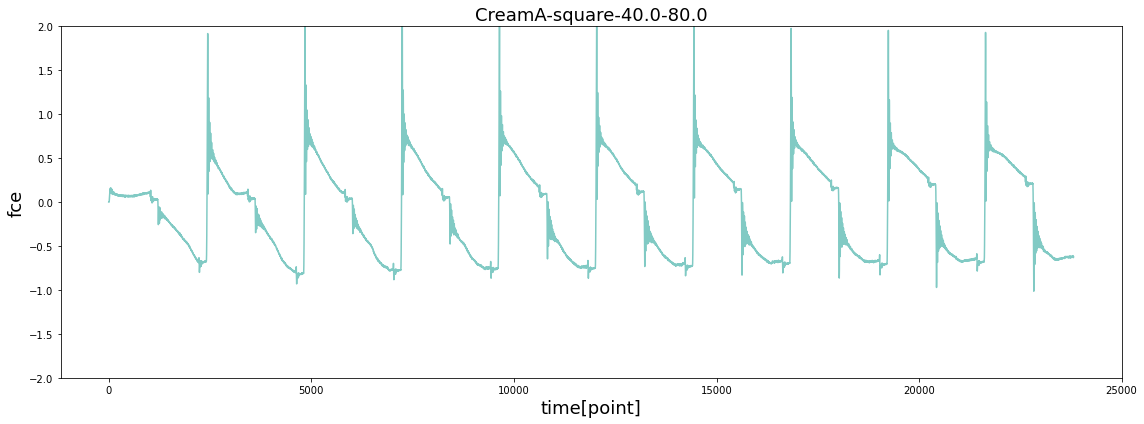

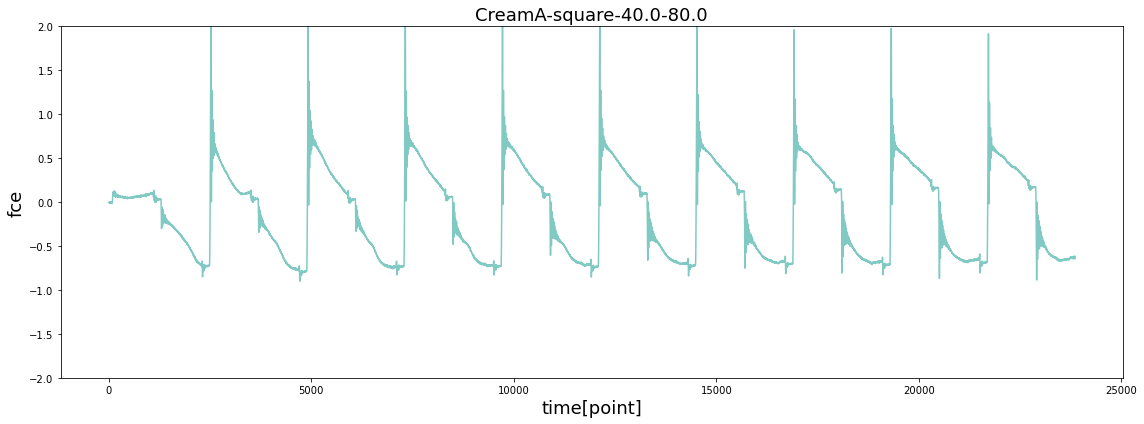

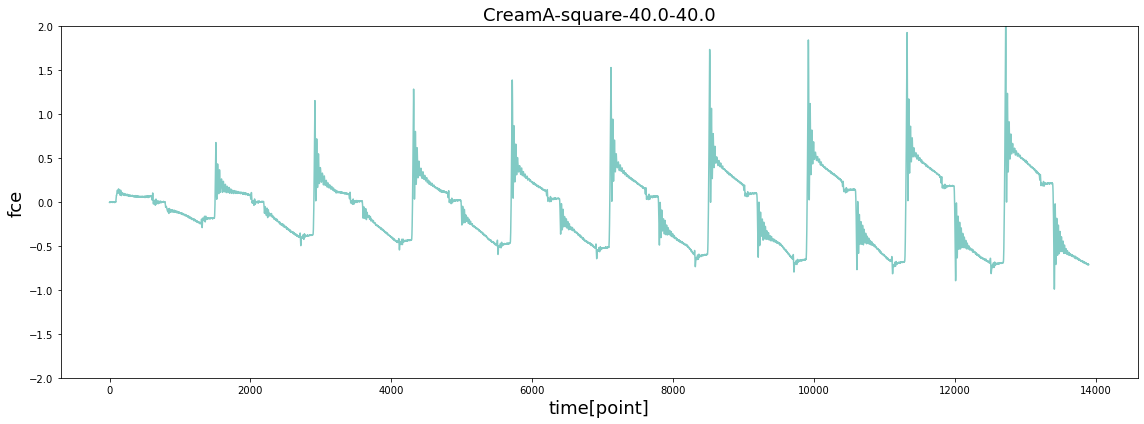

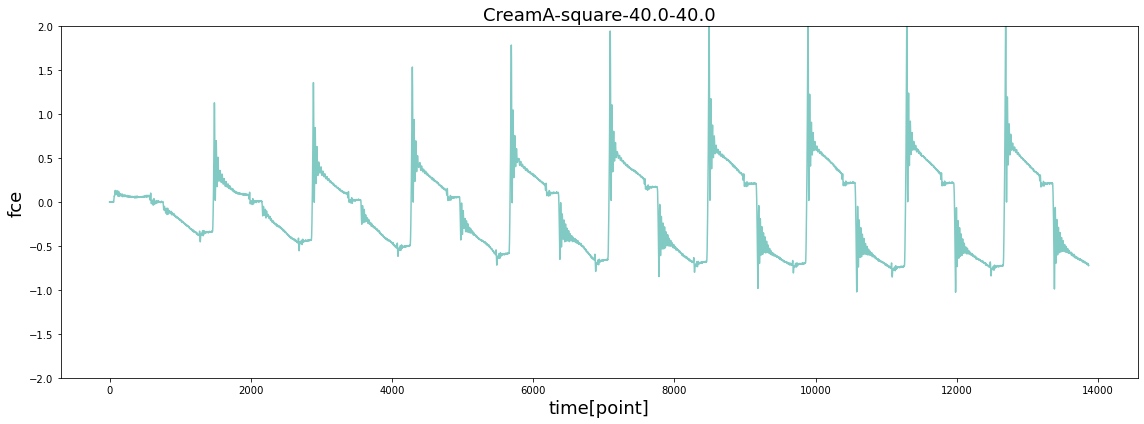

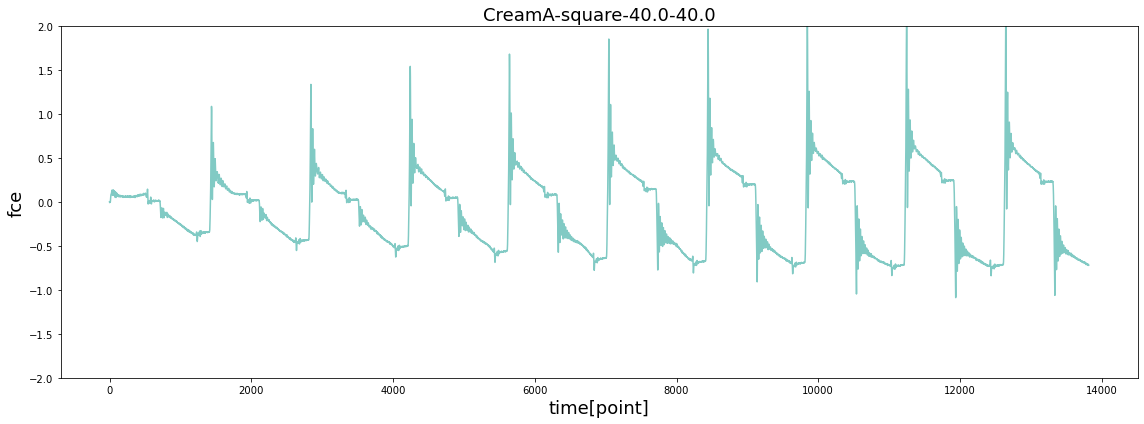

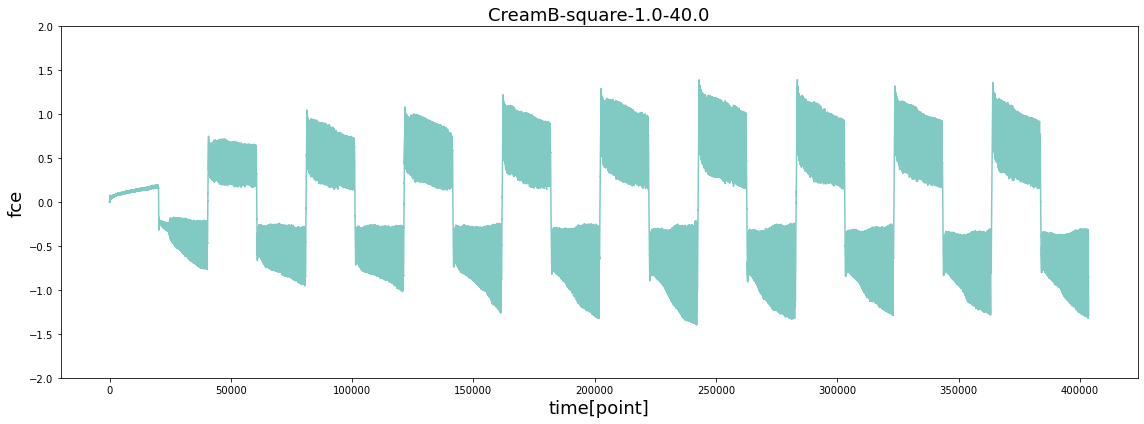

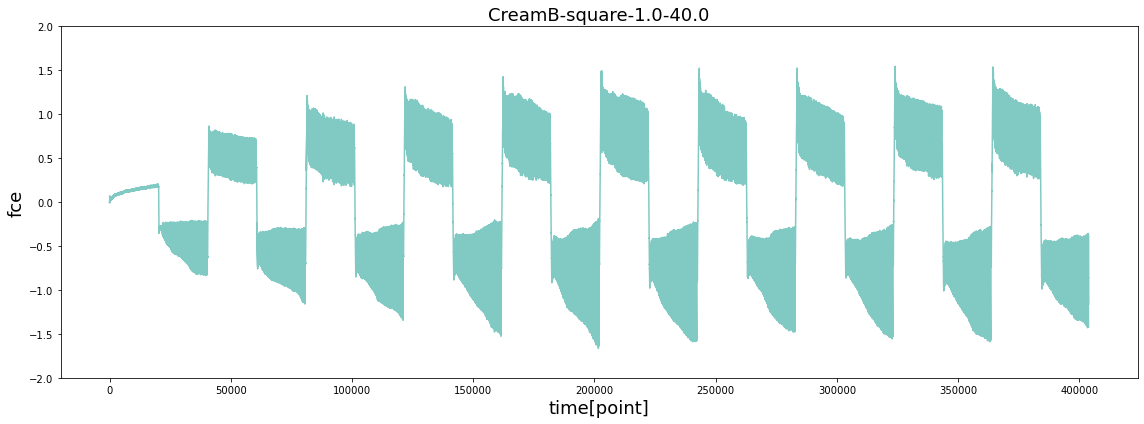

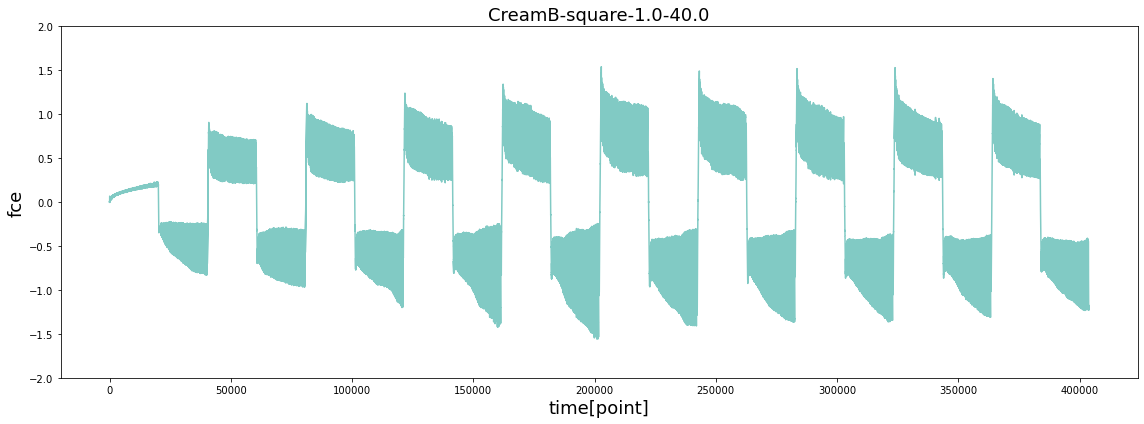

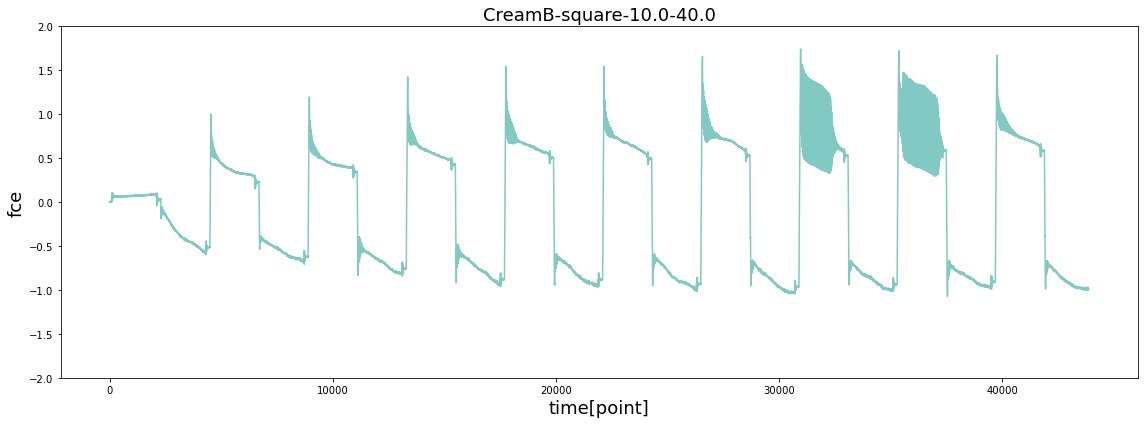

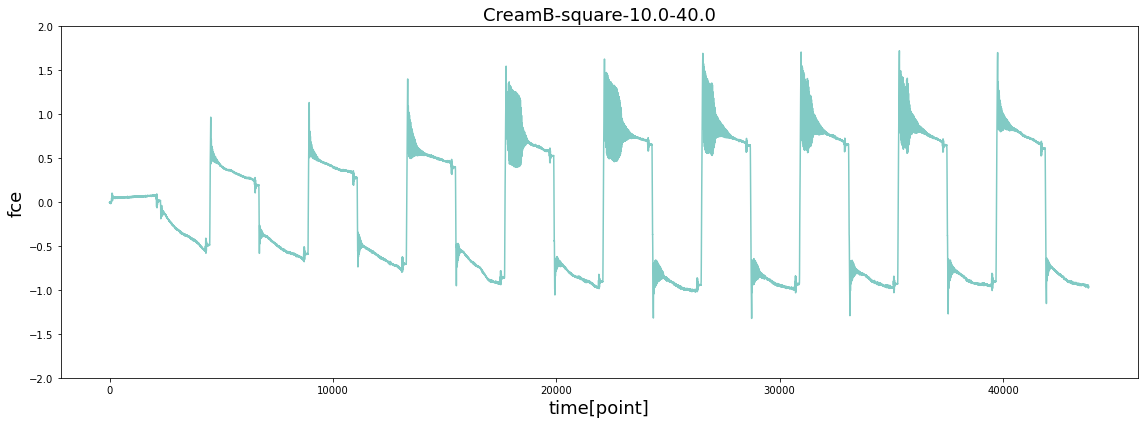

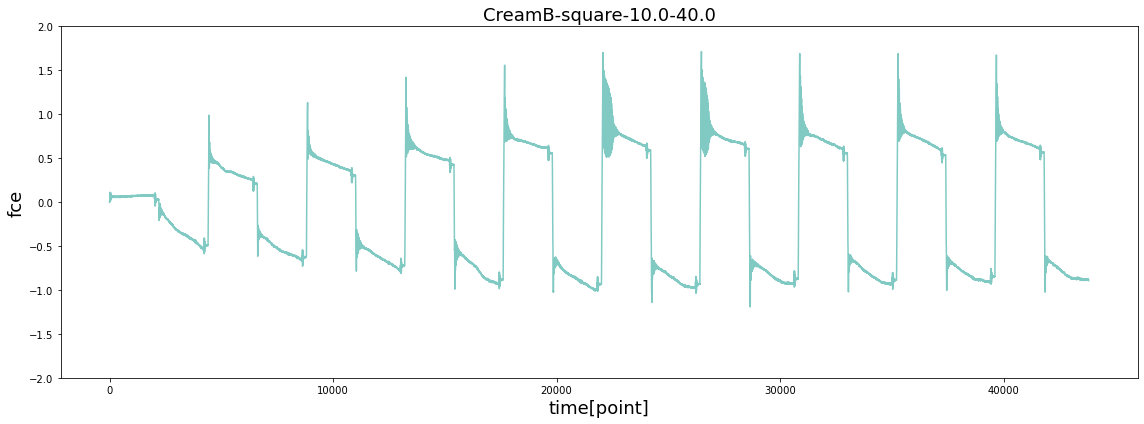

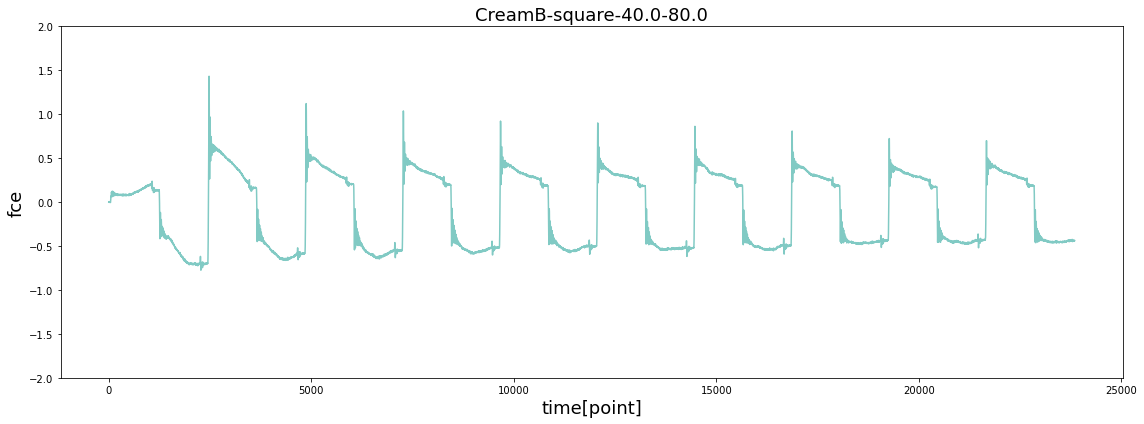

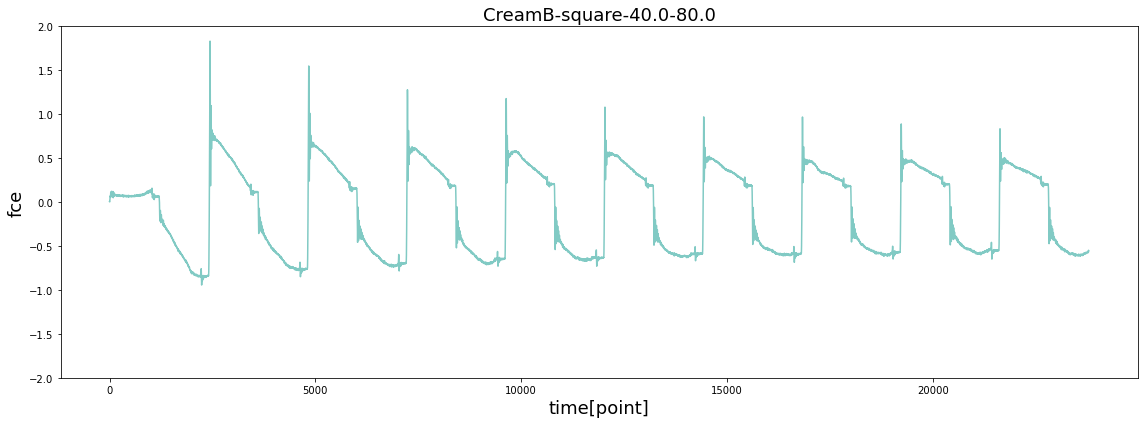

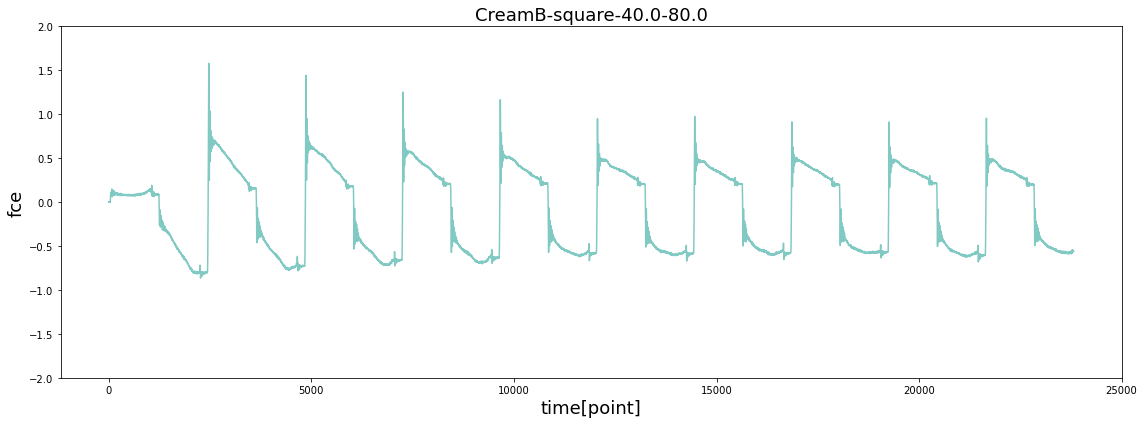

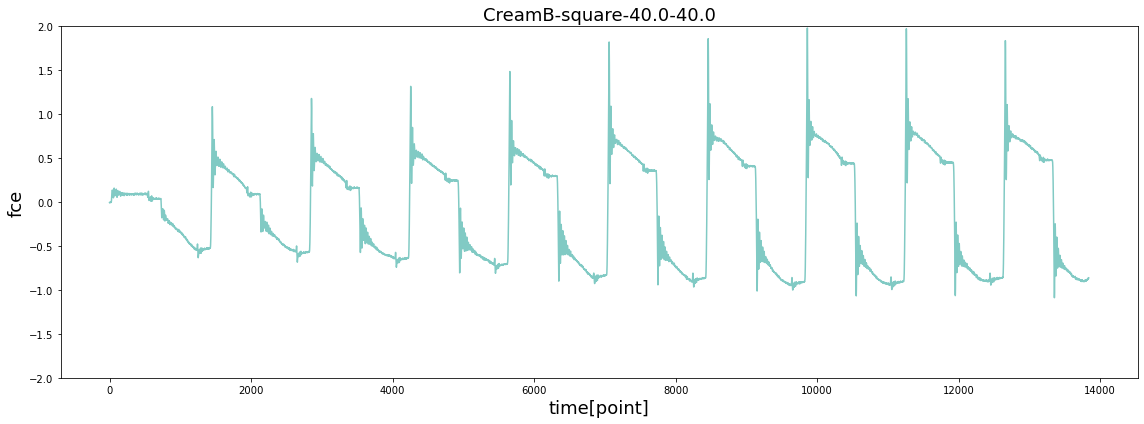

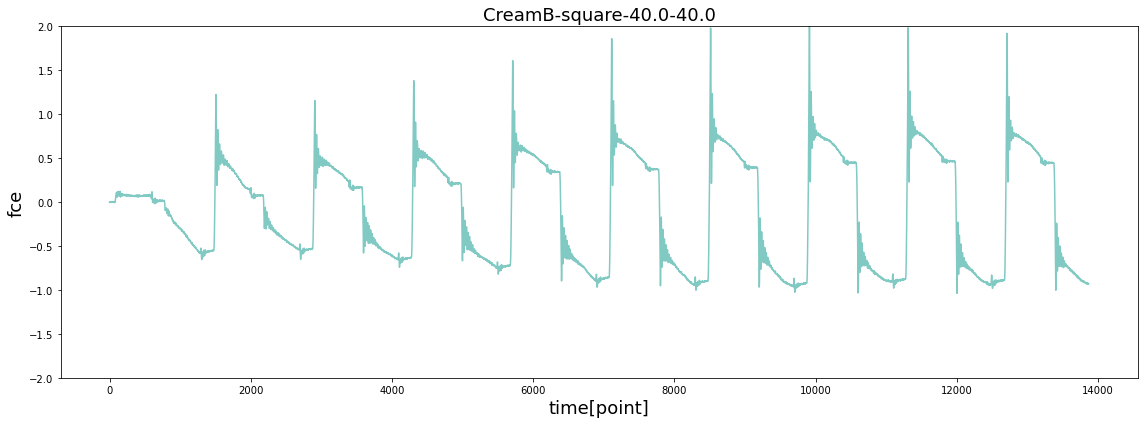

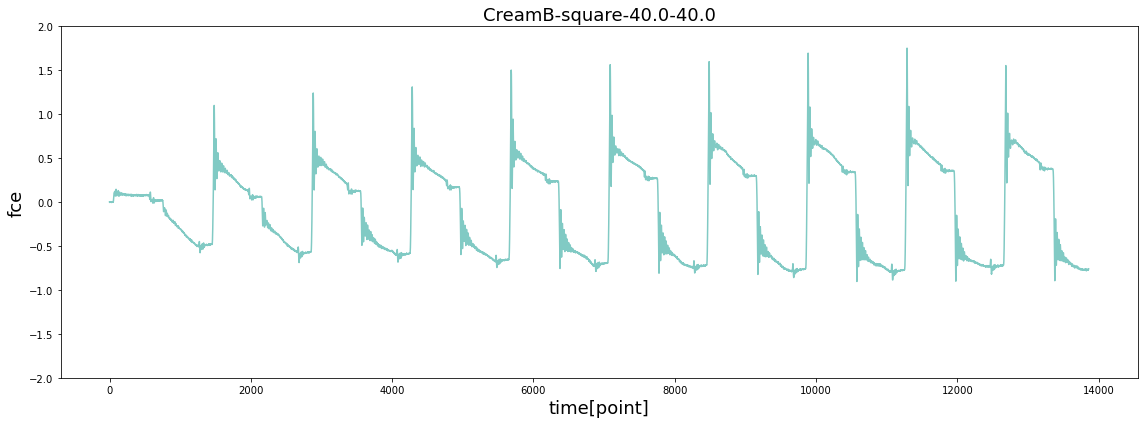

In [6]:
for i in v_data_conditions.index:
    if v_frictionData[str(i)].type == 'sin':
        v_range_fce = 0.2
    elif v_frictionData[str(i)].type == 'square':
        v_range_fce = 2.0
    v_frictionData[str(i)].plot_rawData(v_range_fce)

## Trend x Period x Residualに分解

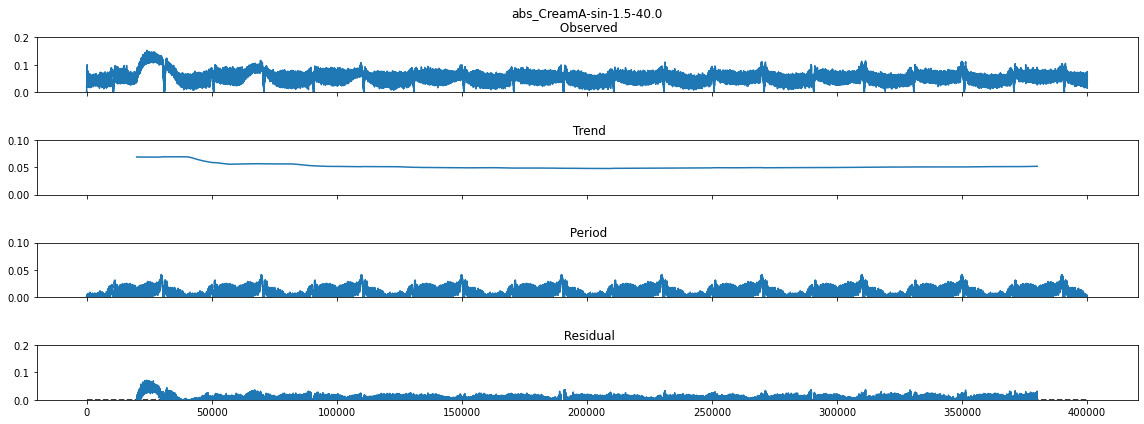

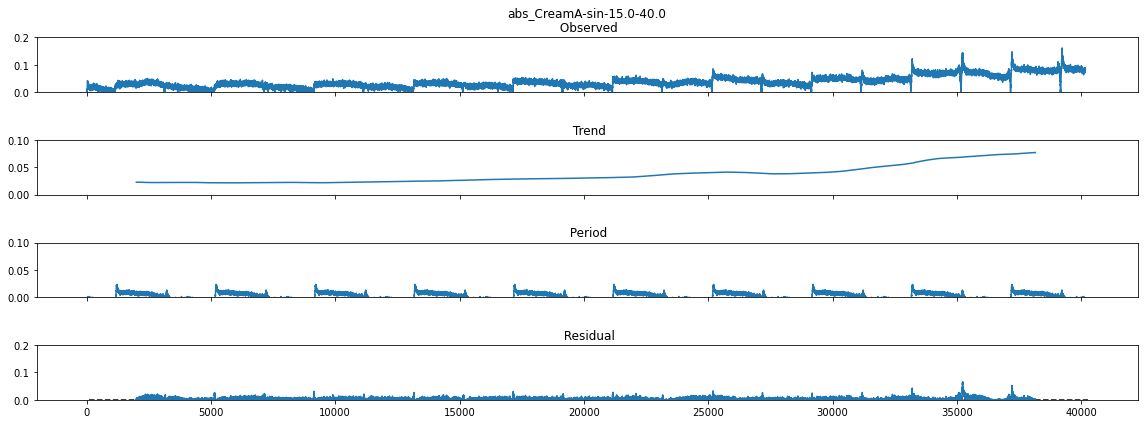

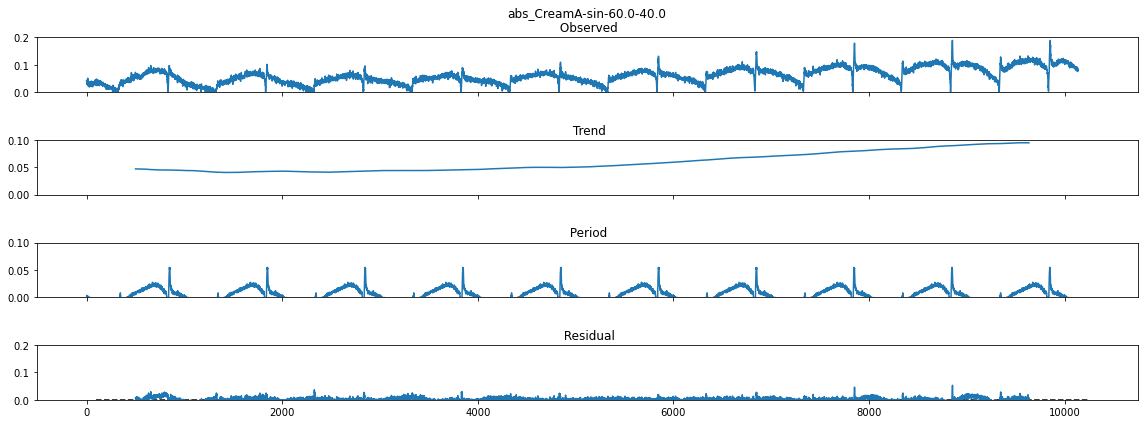

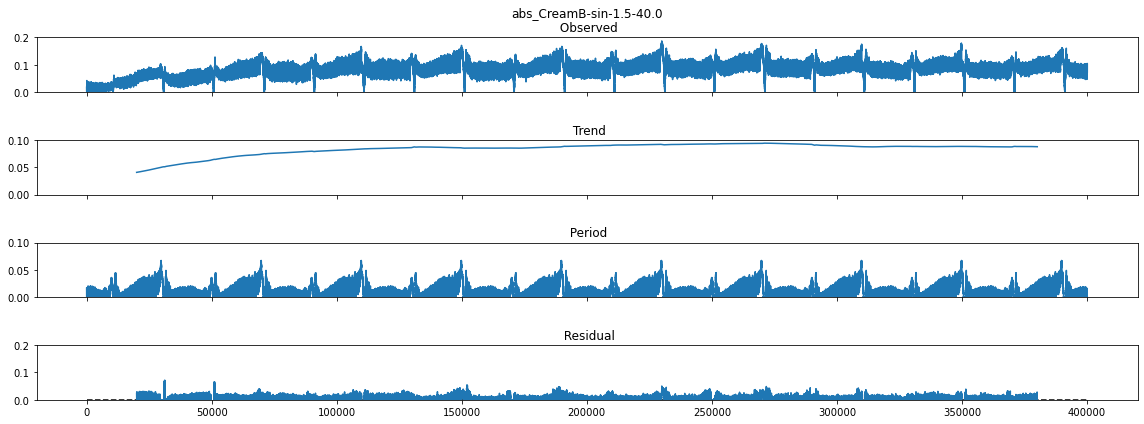

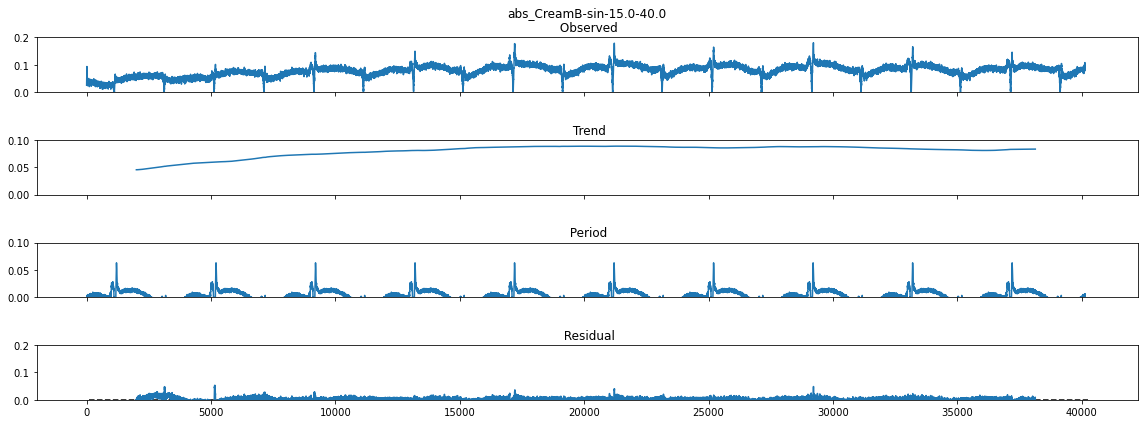

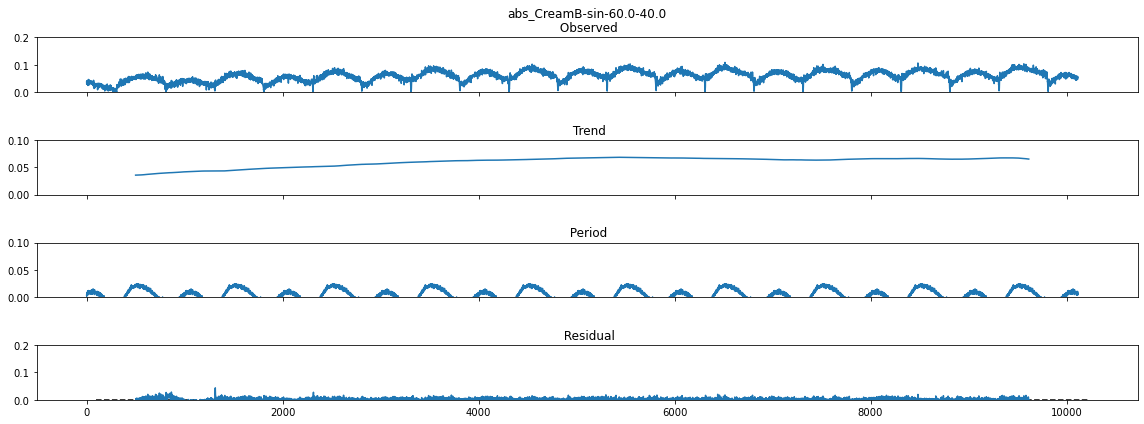

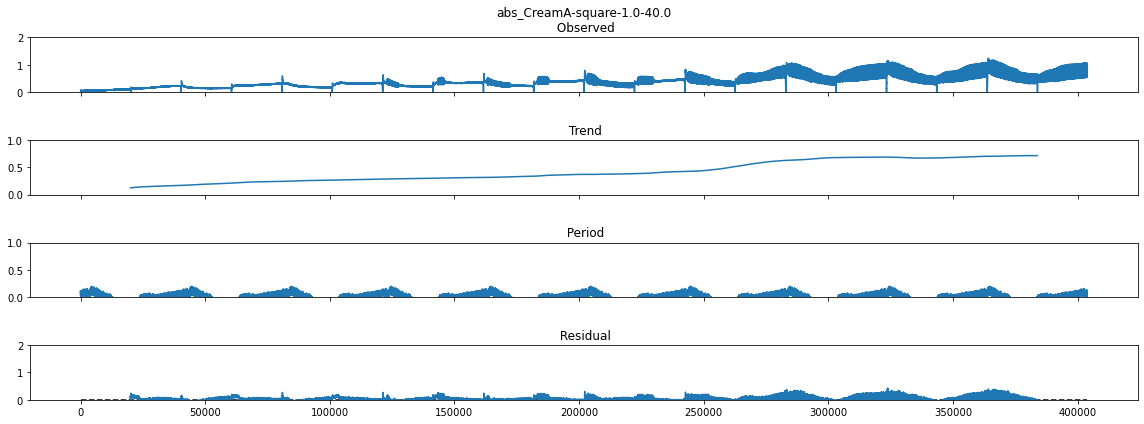

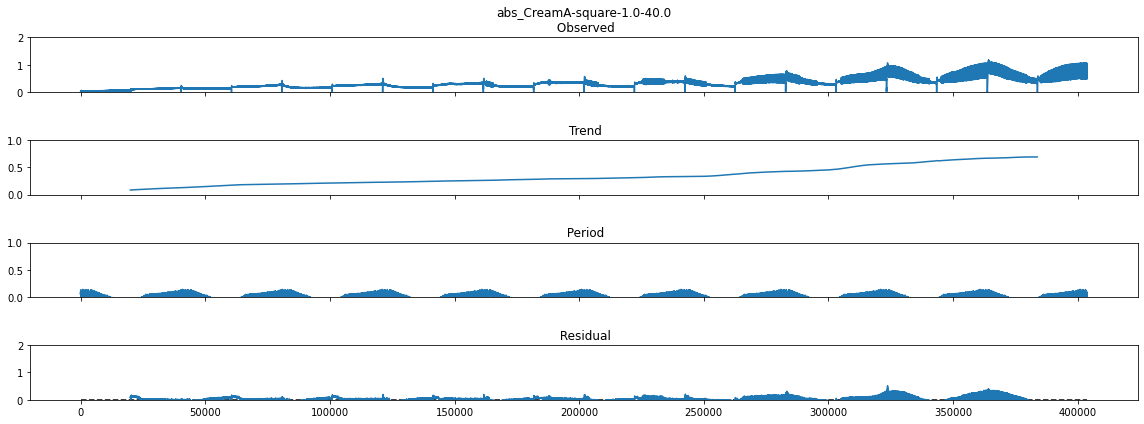

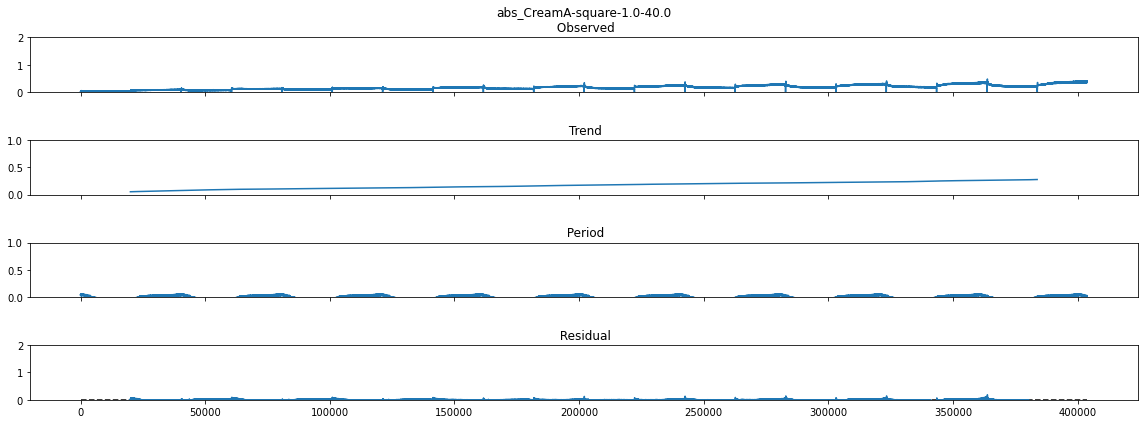

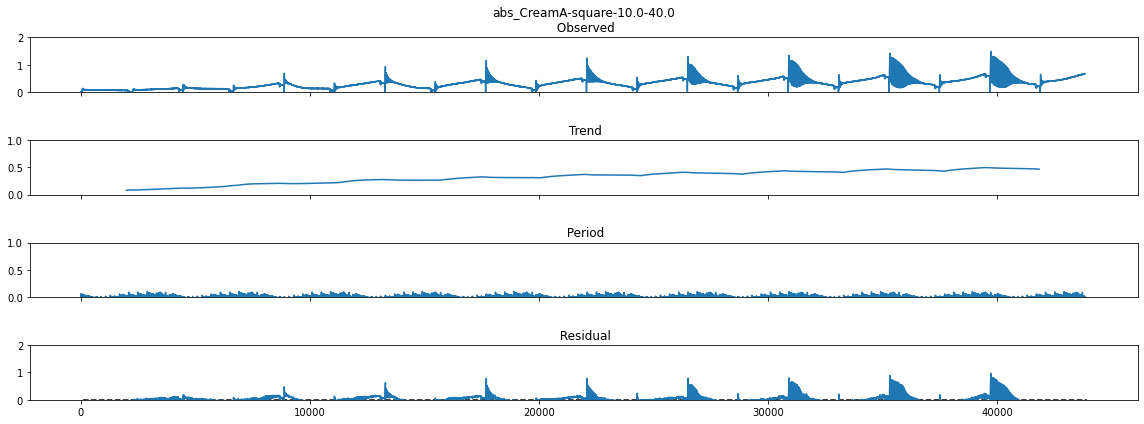

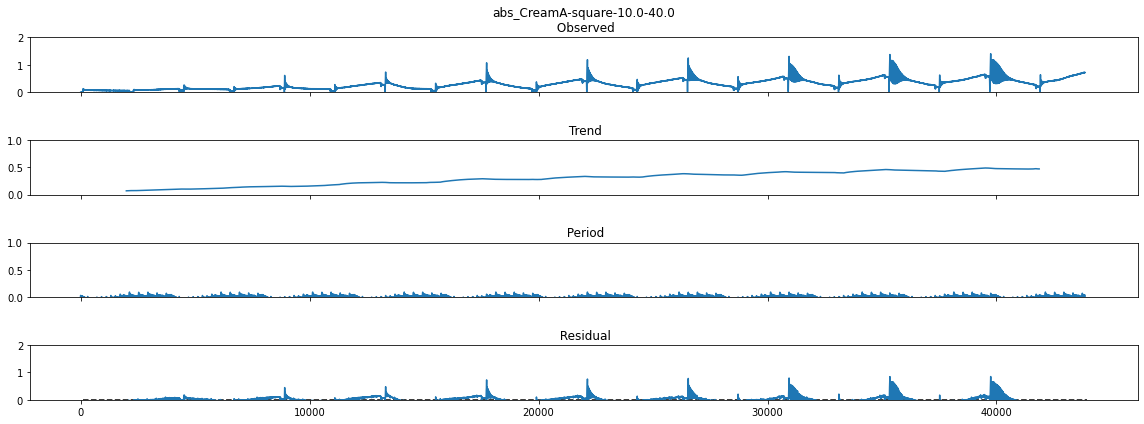

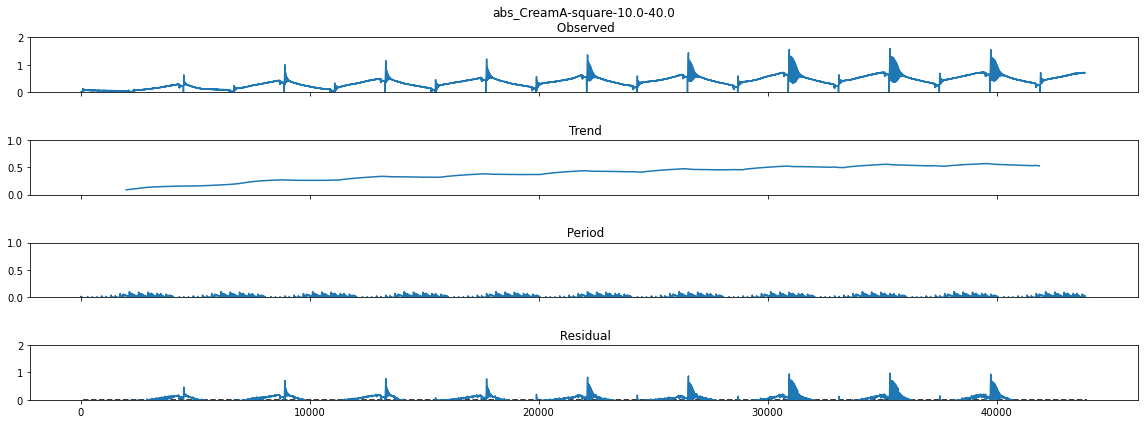

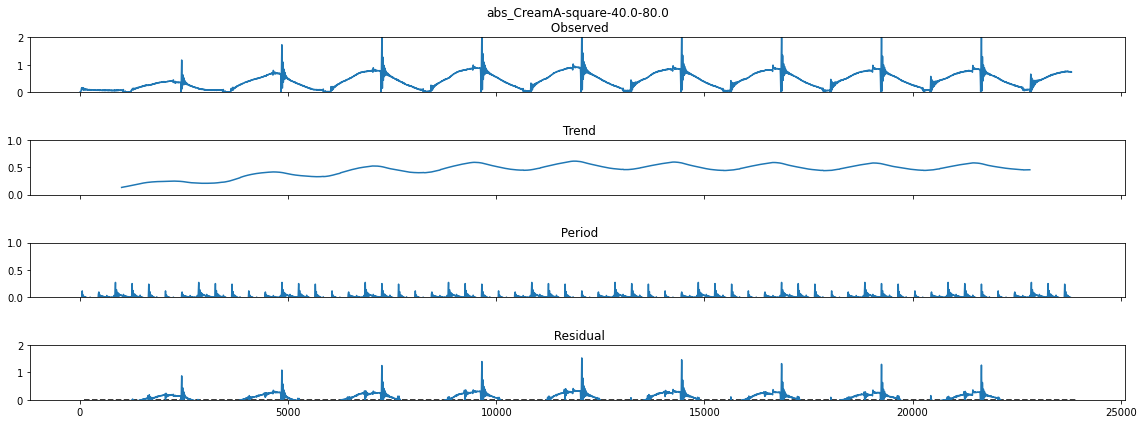

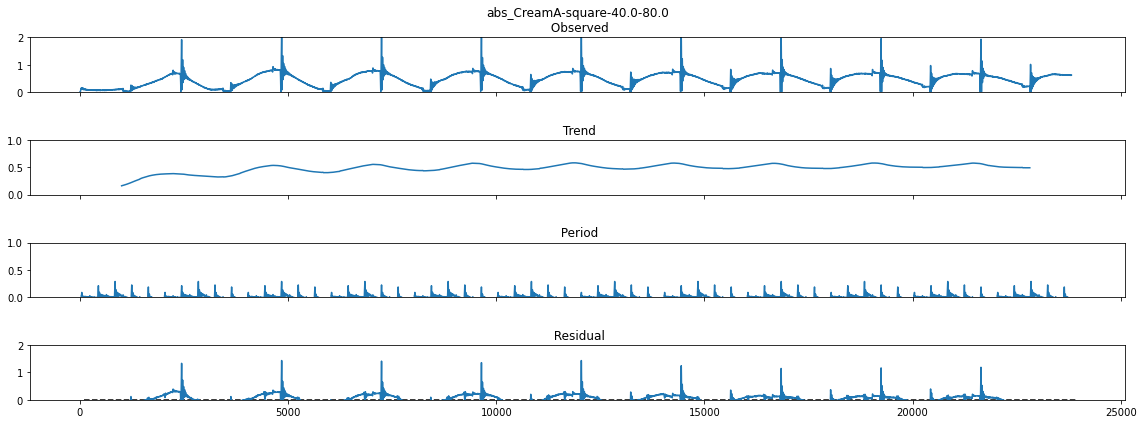

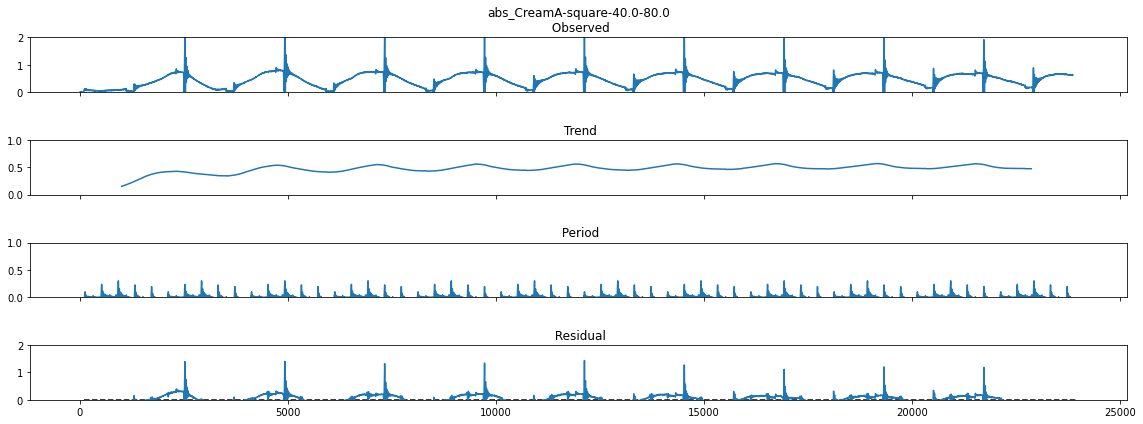

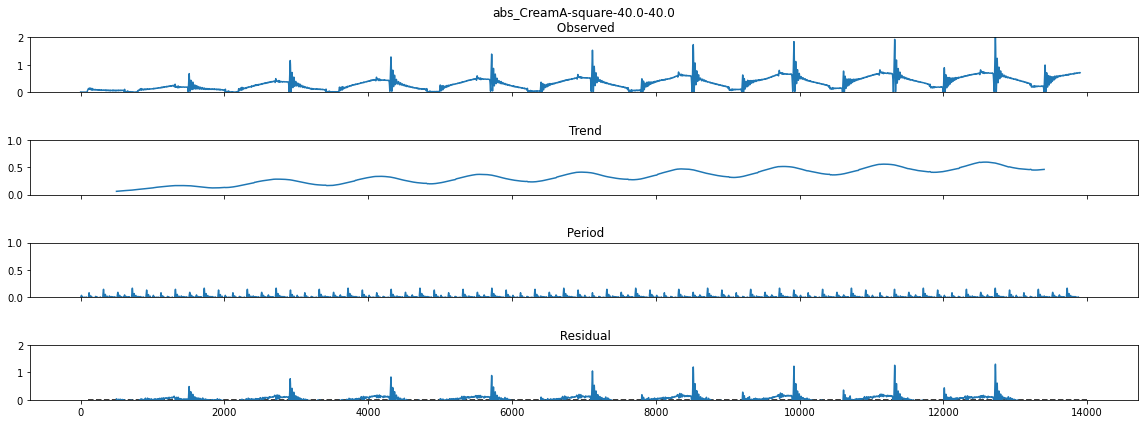

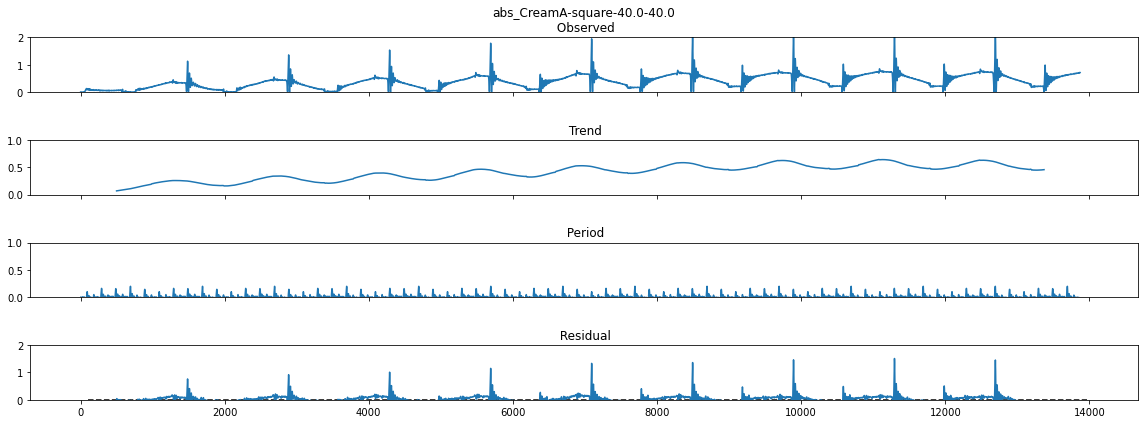

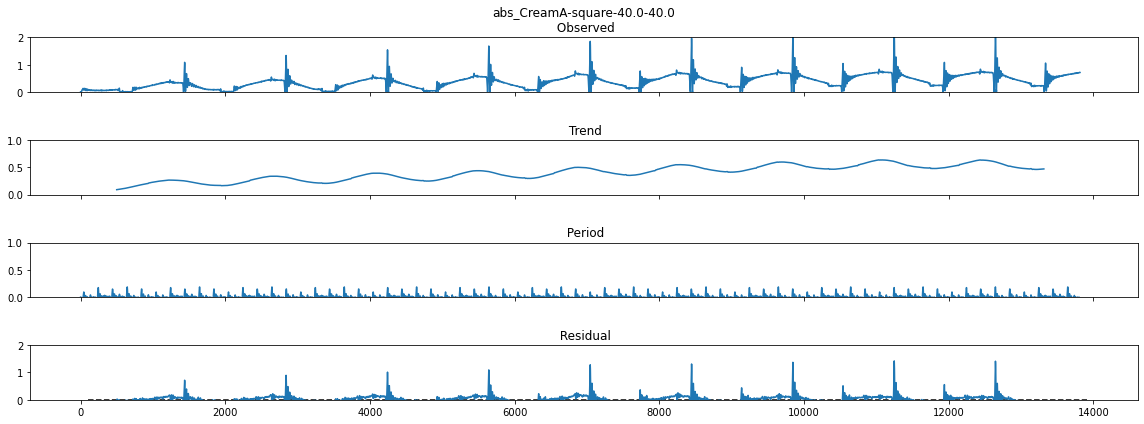

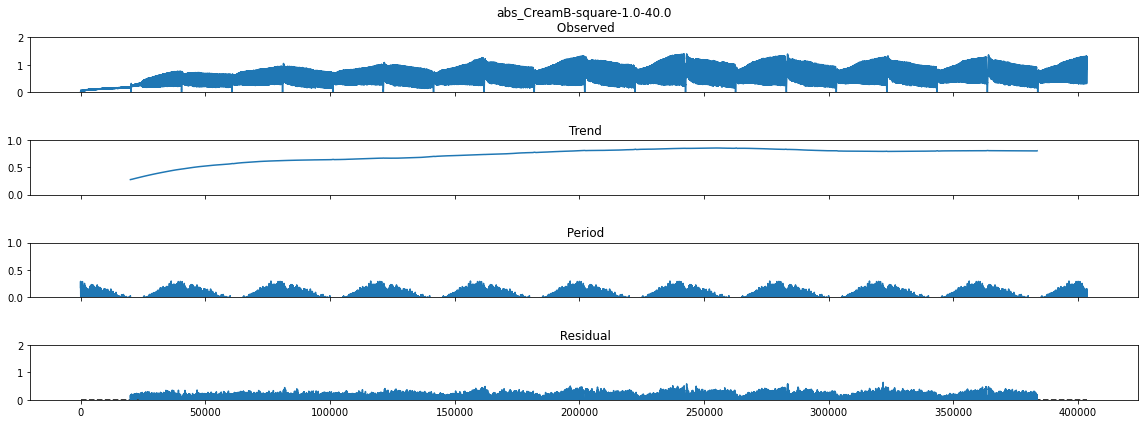

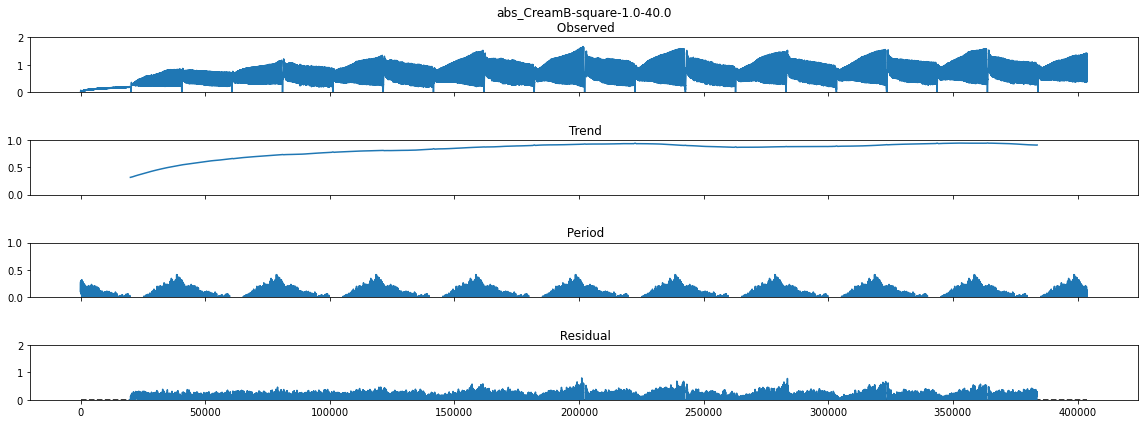

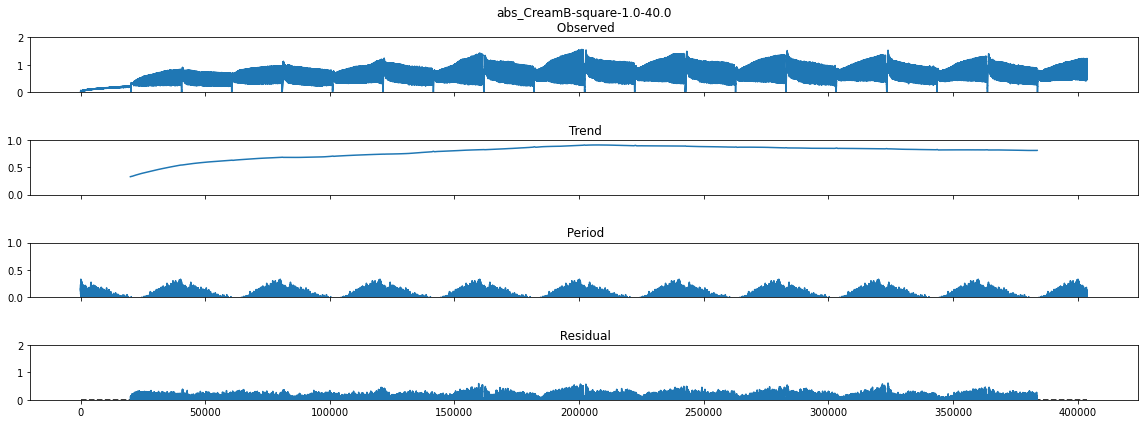

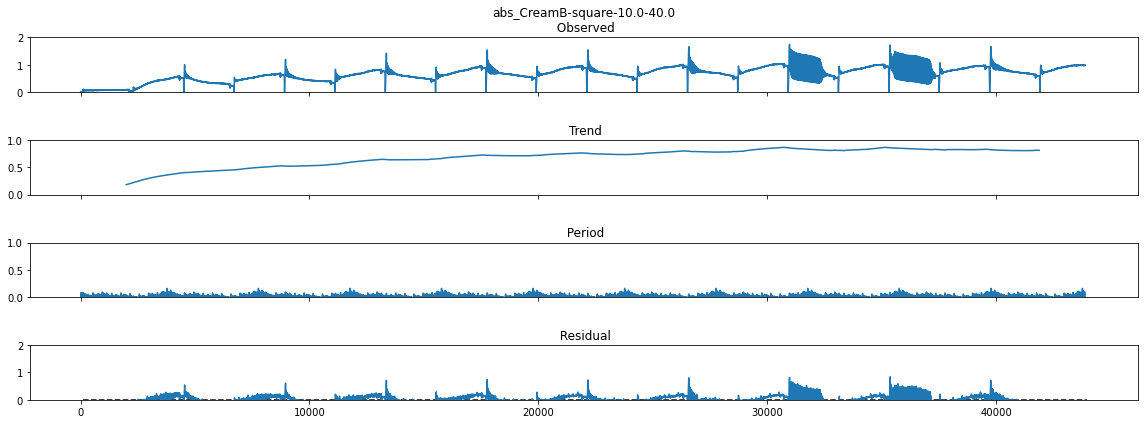

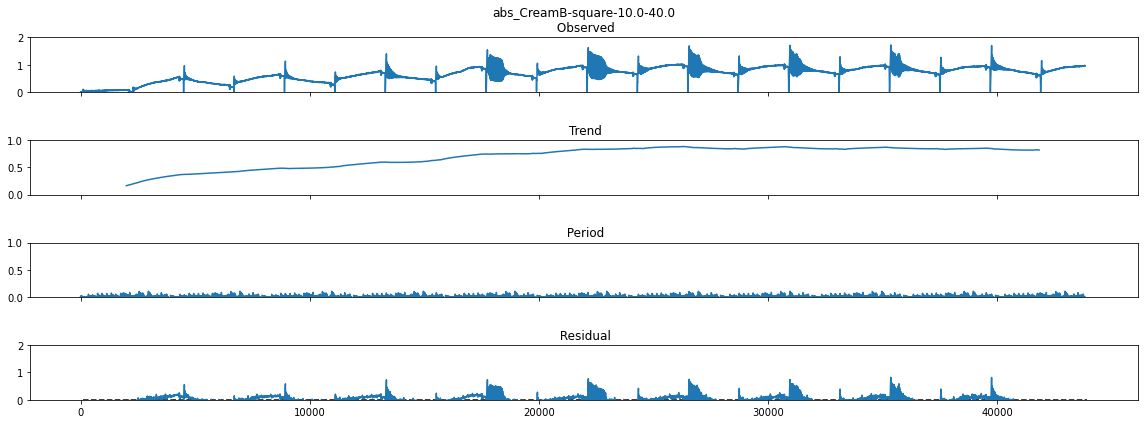

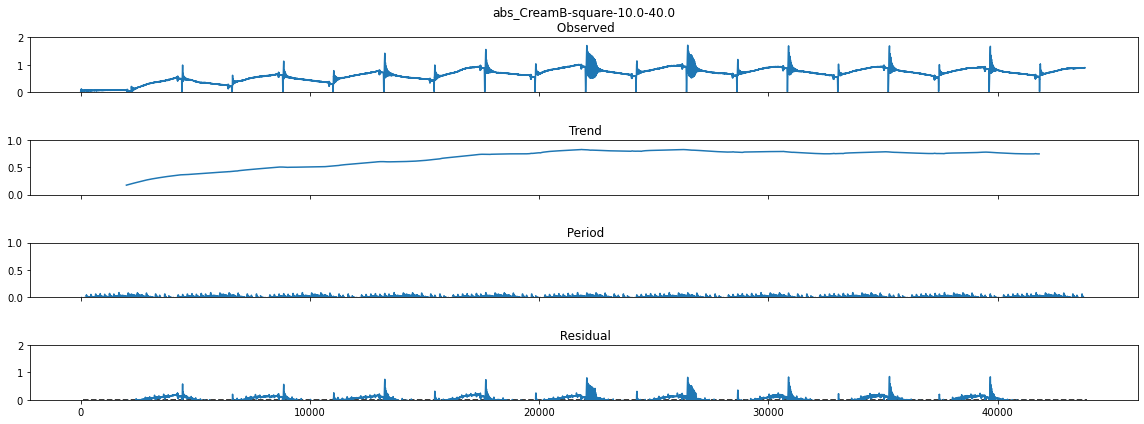

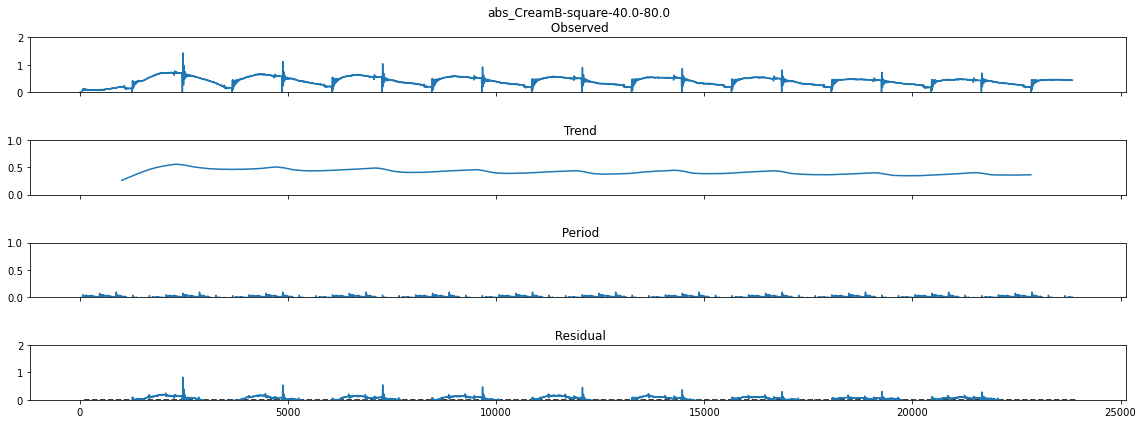

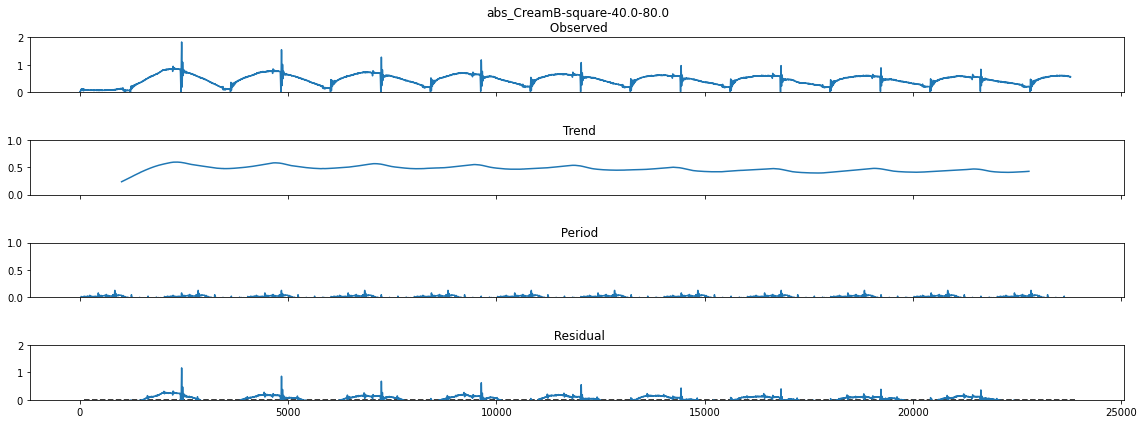

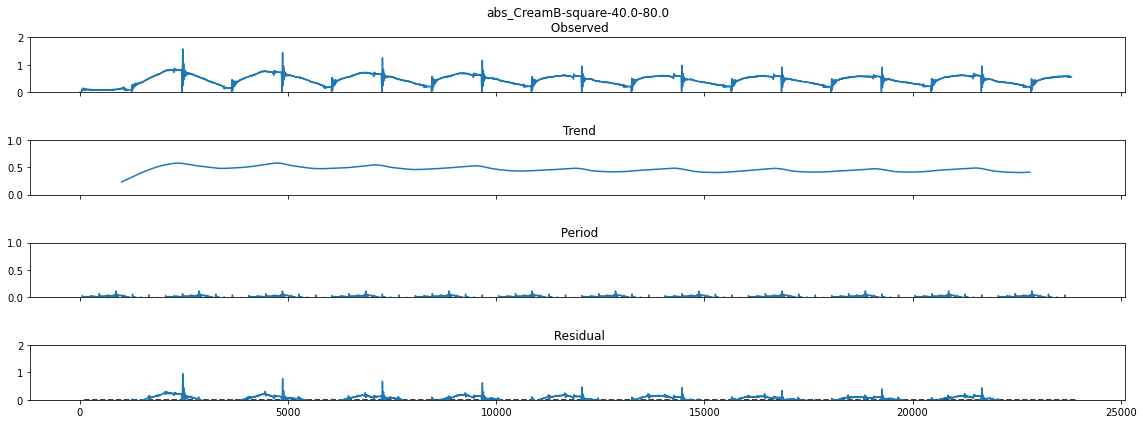

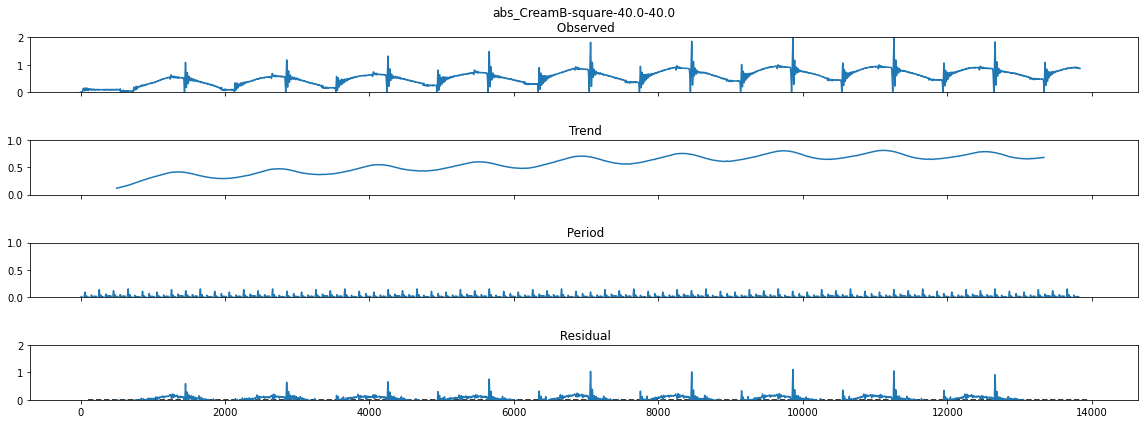

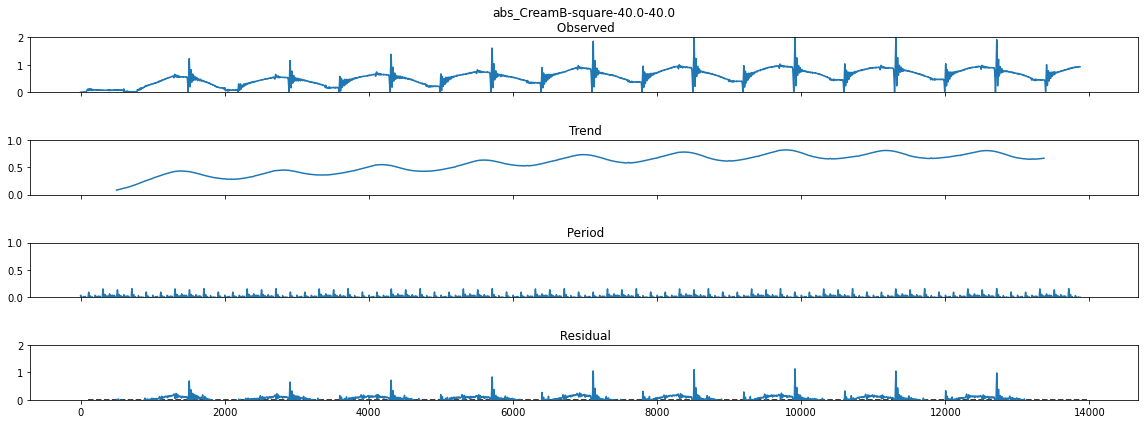

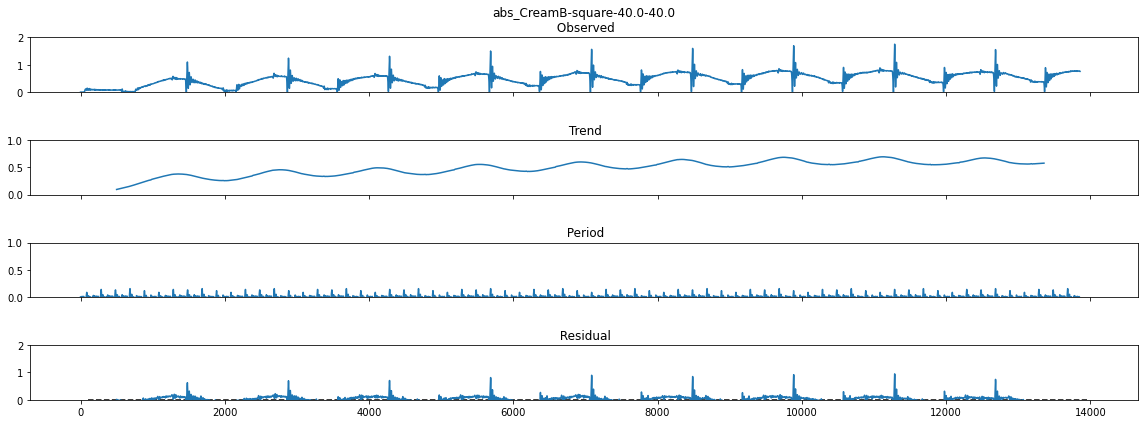

In [7]:
for i in v_data_conditions.index:
    if v_frictionData[str(i)].type == 'sin':
        v_range_dcp = [0.2, 0.1, 0.1, 0.2]
    elif v_frictionData[str(i)].type == 'square':
        v_range_dcp = [2.0, 1.0, 1.0, 2.0]
    v_frictionData[str(i)].decompose_abs(v_range_dcp)

## 速度 VS 摩擦係数

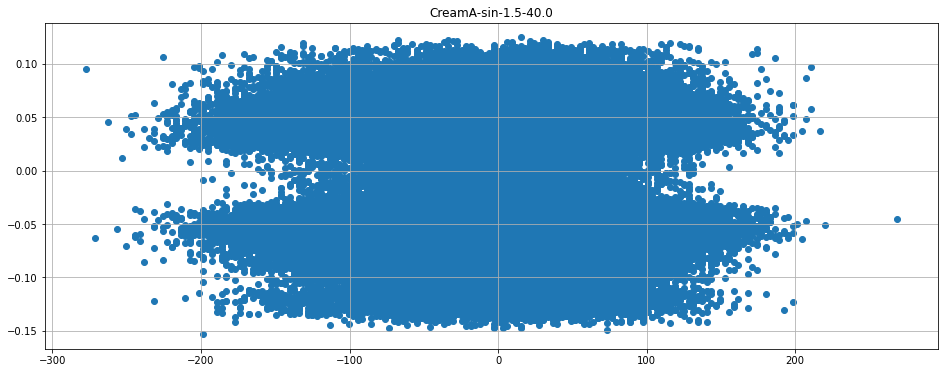

-0.011601090795835798


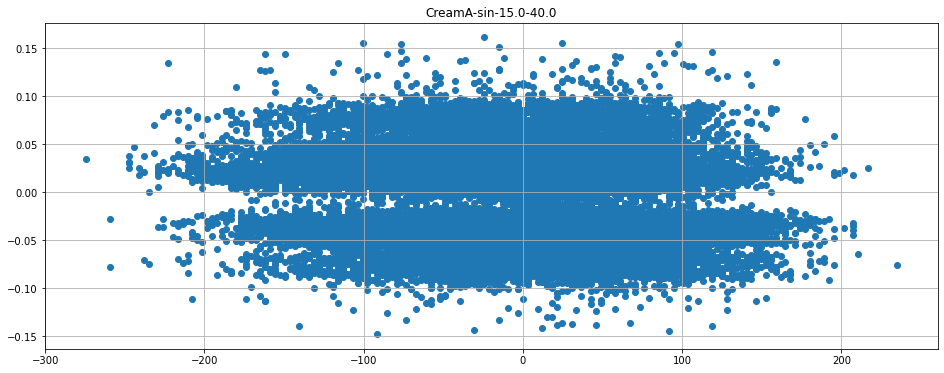

-0.12546445562047717


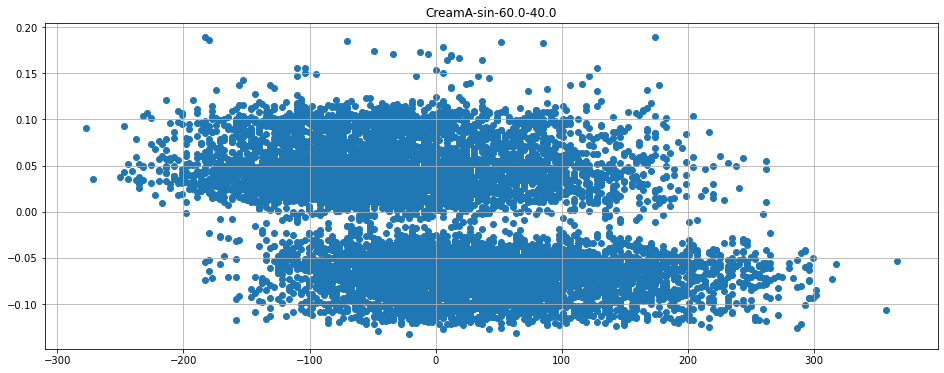

-0.39640791040083506


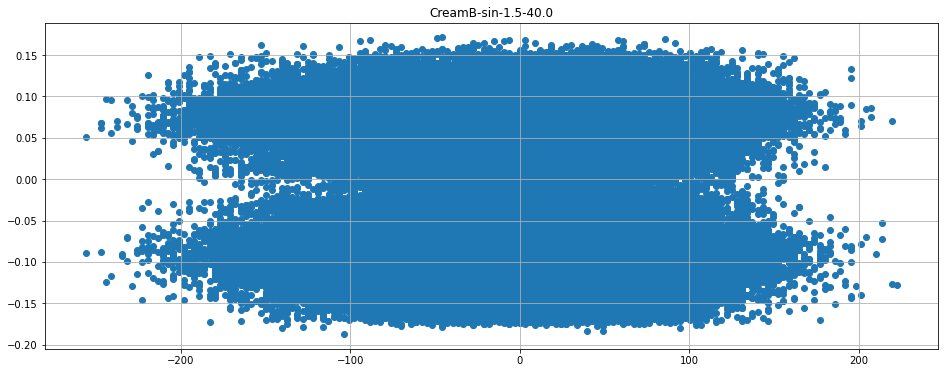

-0.01317840955814643


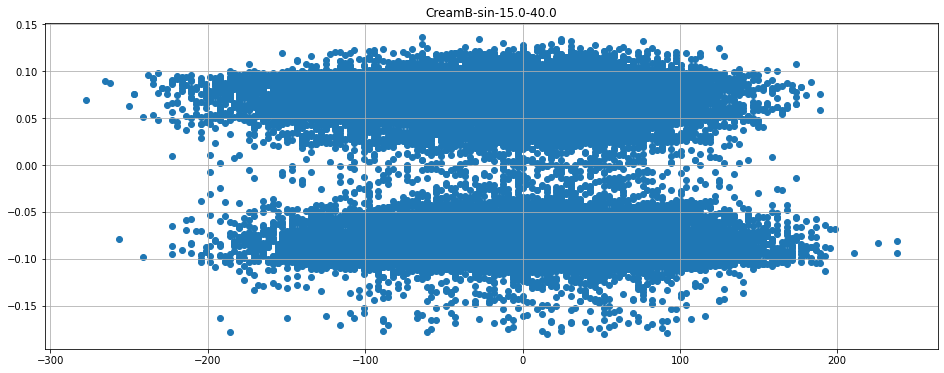

-0.14149835299862296


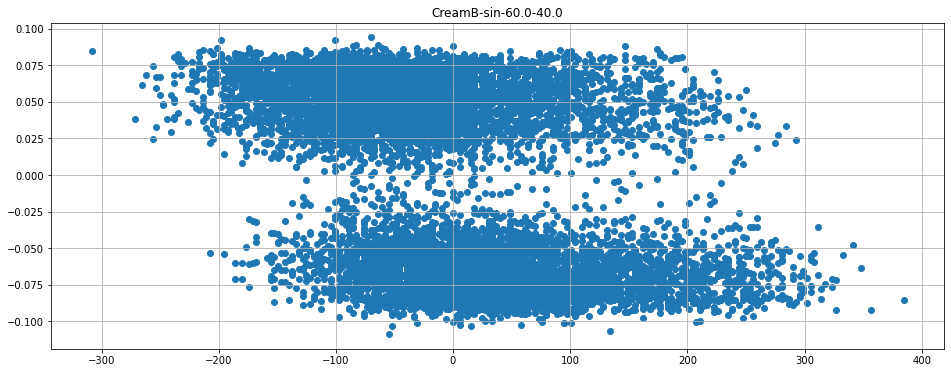

-0.42073598758045033


In [6]:
for i in v_data_conditions.index:
    if v_frictionData[str(i)].type == 'sin':
        v_frictionData[str(i)].calc_v_vs_fce()
        print(v_frictionData[str(i)].data['v'].corr(v_frictionData[str(i)].data['fce']))

### データ全般
* 荷重，速度，片道のキョリ，サンプリングレート，リセット・スタート・ストップ時間は正しい？csvから自動で抜ける？

### 生データの描画
* 同じ条件でもsinと矩形で摩擦係数が大きく違う
* 矩形、chifure 1mmps のみN=1,2とN=3で傾向が違う、N=3だけノイズが小さい？
* chifureは往復で非対称性が大きい

### 速度と摩擦係数の相関
* 速度が速い時、負の相関がある
* 速度が遅い時、相関が消失